# Determinación de tamaño para kmers específicos

<hr>

<div align="right">Marco Muñoz Pérez <br> marcomunozperez@uma.es</div>

<hr>

### Objetivos

- Determinar a que tamaño podemos observar kmers específicos del organismo
<hr>

### Metodología aplicada

Para saber a que tamaño de kmers se encuentran kmers específicos del organismo se va a realizar lo siguiente:

- Obtener las frecuencias de kmers para un rango de tamaños (2-20)
- Obtener el tamaño para el cual la frecuencia sea mas baja entre todos los tamaños

Se ha creado un programa en Python para cubrir estos requisitos y ve va a demostrar su funcionamiento con un ejemplo práctico.

<hr>

### Prueba del código

A continuación se va probar el código creado, para dos secuencias: **myco01** y **Lactococcus lactis** (complete genome).

In [3]:
from organismSpecificKmers import *
import matplotlib.pyplot as plt

En primer lugar definimos las rutas a los dos fasta que vamos a usar como ejemplo.

In [4]:
file_name1 = 'TestSequences/Myco01.fasta'
file_name2 = '/Volumes/1TB HDD/sequences/Bacteria/GCF_000006865.1_ASM686v1_genomic.fna'
sequence1 = list(SeqIO.parse(file_name1, "fasta"))
sequence2 = list(SeqIO.parse(file_name2, "fasta"))

A continuación llamamos a la función que realiza todo el proceso de cálculo de k con kmers únicos:

In [6]:
lowest_unique_kmers([sequence1[0], sequence2[0]], range(2, 20))

  0%|          | 0/18 [00:00<?, ?it/s]

> gi|148377268|ref|NC_009497.1| k=6-> 7 unique kmers


100%|██████████| 18/18 [01:08<00:00,  3.80s/it]


> NC_002662.1 k=8-> 969 unique kmers


El resultado nos indica que, para la secuencia *Myco01*, los primeros kmers específicos son **7** para **k=6**. Es decir, para esta secuencia el menor número de kmers con frecuencia 1 se encuentra en k=6.

En el caso de *Lactococcus lactis* se encontraron **969** kmers unicos en **k=8**.

Para mostrar una representación de lo que ocurre en todo este proceso, vamos a realizar el computo con una gráfica:

In [5]:
low_kmers1 = get_count_of_kmer_1(str(sequence1[0].seq), range(2, 20))
low_kmers2 = get_count_of_kmer_1(str(sequence2[0].seq), range(2, 20))

100%|██████████| 18/18 [01:09<00:00,  3.85s/it]


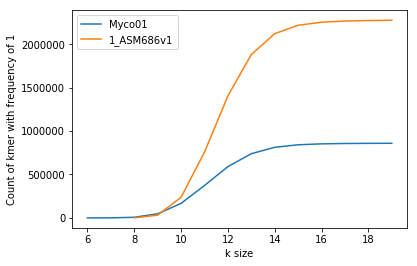

In [7]:
plt.plot(low_kmers1.keys(), low_kmers1.values(), label='Myco01')
plt.plot(low_kmers2.keys(), low_kmers2.values(), label='1_ASM686v1')
plt.legend()
plt.xlabel('k size')
plt.ylabel('Count of kmer with frequency of 1')
plt.show()

Como se puede apreciar, en el *Myco01* la k para la cual empiezan a haber kmers de frecuencia 1 es 6. Se puede ver que conforme aumenta el tamaño de k, va aumentando la cantidad de kmers unicos del organismo, hasta que llegamos a tal cantidad de kmers únicos que todas las frecuencias son 1, para el cual ya no puede aumentar más la cantidad de kmers y lo que se aprecia en la grafica es una asíntota. Para la *Lactococcus lactis* se aprecia un comportamiento homólogo.

Ahora se van a normalizar la cuenta de kmers con tamaño 1, dividiendo el número de kmers con tamaño 1 entre el tamaño total de la secuencia, para poder comparar que porcentaje de la secuencia corresponde a kmers únicos.

In [8]:
norm_low_kmers1 = normalize_count(low_kmers1, len(str(sequence1[0].seq)))
norm_low_kmers2 = normalize_count(low_kmers2, len(str(sequence2[0].seq)))

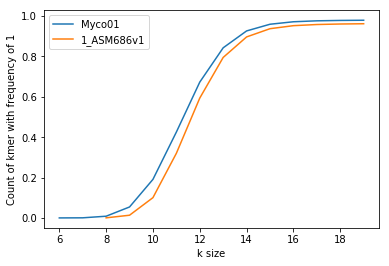

In [9]:
plt.plot(norm_low_kmers1.keys(), norm_low_kmers1.values(), label='Myco01')
plt.plot(norm_low_kmers2.keys(), norm_low_kmers2.values(), label='1_ASM686v1')
plt.legend()
plt.xlabel('k size')
plt.ylabel('Count of kmer with frequency of 1')
plt.show()


Como se puede apreciar en esta segunda gráfica, la proporcion se hace total a medida que van aumentando el tamaño de los kmers, ya que esto hace que los kmers se repitan cada vez menos.

Por tanto podemos concluir que para estos dos casos, el tamaño de kmer a partir del cual se empiezan a encontrar kmers únicos esta entre 6 y 8. Y cabe decir que parece haber una relación directa entre el tamaño de la secuencia y el tamaño del kmer para encontrar estos kmers específicos.

El código fuente y archivos de prueba están disponibles en [BitBucket](https://bitbucket.org/mampz/tyma/src/master/).